<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-11 16:03:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  57.5MB/s    in 3.5s    

2025-07-11 16:04:00 (57.9 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [9]:
query = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
  AND CompTotal != ''
"""

# Read data into DataFrame
df = pd.read_sql_query(query, conn)

In [10]:
# Convert CompTotal to numeric, coercing errors to NaN
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop NaN values after conversion
df = df.dropna(subset=['CompTotal'])

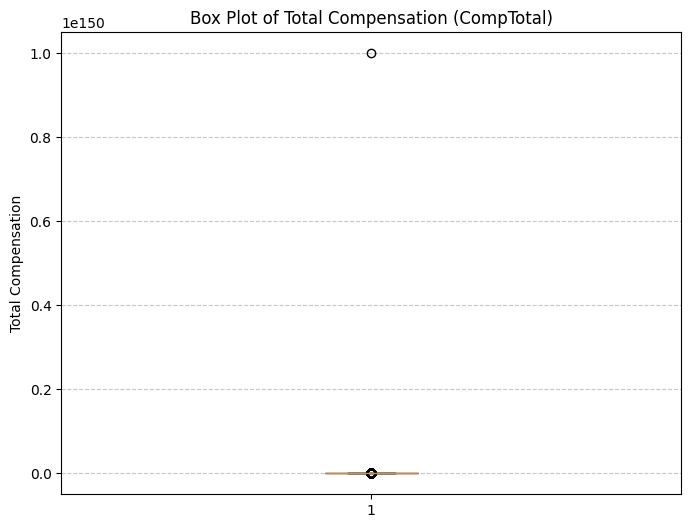

In [11]:
# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['CompTotal'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.ylabel('Total Compensation')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [12]:
query = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
  AND Age != ''
"""
df = pd.read_sql_query(query, conn)

In [14]:
import re
# Function to convert age range string to midpoint numeric value
def age_to_numeric(age_str):
    # Match pattern like '30-34 years old' or 'Under 16 years old'
    if 'Under' in age_str:
        return 15  # assume midpoint under 16 as 15
    elif 'Over' in age_str:
        return 65  # assume over 60 as 65
    else:
        match = re.search(r'(\d+)-(\d+)', age_str)
        if match:
            low, high = int(match.group(1)), int(match.group(2))
            return (low + high) / 2
    return None  # fallback if no match

# Apply conversion
df['AgeNumeric'] = df['Age'].apply(age_to_numeric)


In [15]:
# Drop rows where conversion failed
df = df.dropna(subset=['AgeNumeric'])

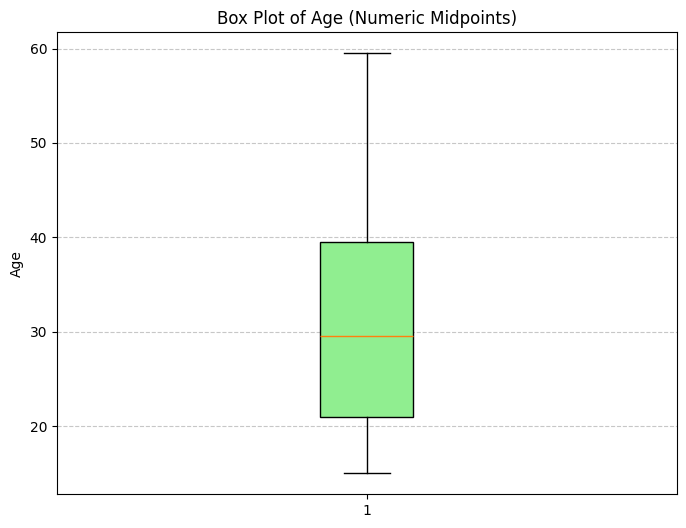

In [16]:
# Plot box plot of AgeNumeric
plt.figure(figsize=(8, 6))
plt.boxplot(df['AgeNumeric'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot of Age (Numeric Midpoints)')
plt.ylabel('Age')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [17]:
query = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
  AND CompTotal IS NOT NULL
  AND CompTotal != ''
"""
df = pd.read_sql_query(query, conn)

In [18]:
# Convert CompTotal to numeric (coerce errors)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows with missing or invalid CompTotal
df = df.dropna(subset=['CompTotal'])

In [19]:
age_order = [
    'Under 16 years old', '16-17 years old', '18-24 years old', '25-29 years old',
    '30-34 years old', '35-39 years old', '40-44 years old', '45-49 years old',
    '50-54 years old', '55-59 years old', '60-69 years old', '70 years or older'
]
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Drop rows with Age values not in age_order (optional)
df = df.dropna(subset=['Age'])

<Figure size 1200x800 with 0 Axes>

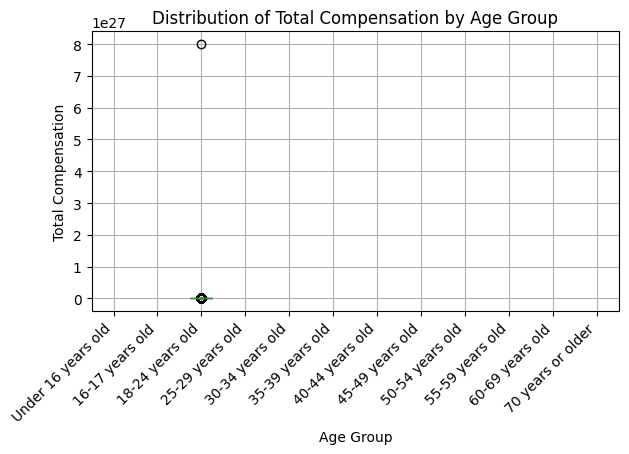

In [20]:
# Plot boxplot grouped by Age
plt.figure(figsize=(12, 8))
df.boxplot(column='CompTotal', by='Age', grid=True, patch_artist=True,
           boxprops=dict(facecolor='lightblue'))

plt.title('Distribution of Total Compensation by Age Group')
plt.suptitle('')  # Suppress default title
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


In [21]:
# Query data
query = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL
  AND CompTotal IS NOT NULL
  AND CompTotal != ''
"""
df = pd.read_sql_query(query, conn)


In [22]:
# Convert CompTotal to numeric (coerce errors)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')

# Drop rows with missing or invalid CompTotal or JobSatPoints_6
df = df.dropna(subset=['CompTotal', 'JobSatPoints_6'])

In [23]:
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df = df.dropna(subset=['JobSatPoints_6'])

<Figure size 1200x800 with 0 Axes>

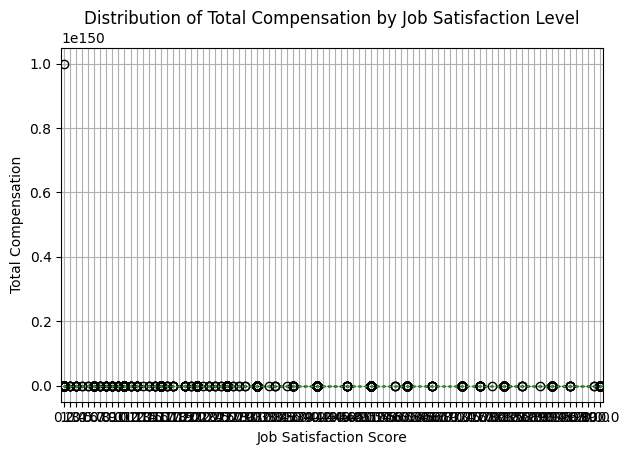

In [24]:
# Plot boxplot grouped by JobSatPoints_6
plt.figure(figsize=(12, 8))
df.boxplot(column='CompTotal', by='JobSatPoints_6', grid=True, patch_artist=True,
           boxprops=dict(facecolor='lightgreen'))

plt.title('Distribution of Total Compensation by Job Satisfaction Level')
plt.suptitle('')  # Suppress default title
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Total Compensation')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [25]:
query_top5 = """
SELECT DevType, COUNT(*) as count
FROM main
WHERE DevType IS NOT NULL AND DevType != ''
GROUP BY DevType
ORDER BY count DESC
LIMIT 5;
"""
top5 = pd.read_sql_query(query_top5, conn)
top5_list = top5['DevType'].tolist()

In [26]:
# Query compensation for top 5 DevTypes
query_comp = f"""
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IN ({','.join(['?']*len(top5_list))})
  AND ConvertedCompYearly IS NOT NULL
  AND ConvertedCompYearly != ''
"""
df = pd.read_sql_query(query_comp, conn, params=top5_list)

In [27]:
# Convert ConvertedCompYearly to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna(subset=['ConvertedCompYearly'])


<Figure size 1200x800 with 0 Axes>

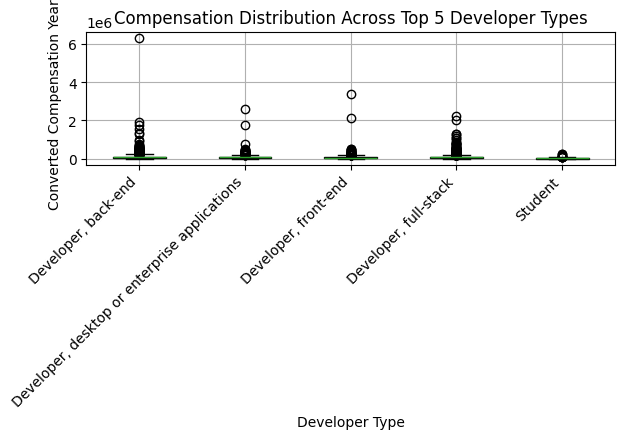

In [28]:
# Plot boxplot
plt.figure(figsize=(12, 8))
df.boxplot(column='ConvertedCompYearly', by='DevType', grid=True, patch_artist=True,
           boxprops=dict(facecolor='skyblue'))

plt.title('Compensation Distribution Across Top 5 Developer Types')
plt.suptitle('')  # Remove default pandas title
plt.xlabel('Developer Type')
plt.ylabel('Converted Compensation Yearly')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [29]:
# Step 1: Get top 5 countries
query_top_countries = """
SELECT Country, COUNT(*) as count
FROM main
WHERE Country IS NOT NULL AND Country != ''
GROUP BY Country
ORDER BY count DESC
LIMIT 5;
"""

In [30]:
top_countries_df = pd.read_sql_query(query_top_countries, conn)
top_countries = top_countries_df['Country'].tolist()

In [31]:
query_compensation = f"""
SELECT Country, CompTotal
FROM main
WHERE Country IN ({','.join(['?']*len(top_countries))})
  AND CompTotal IS NOT NULL
  AND CompTotal != '';
"""
df = pd.read_sql_query(query_compensation, conn, params=top_countries)

In [32]:
# Convert CompTotal to numeric (handle errors)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])

<Figure size 1200x800 with 0 Axes>

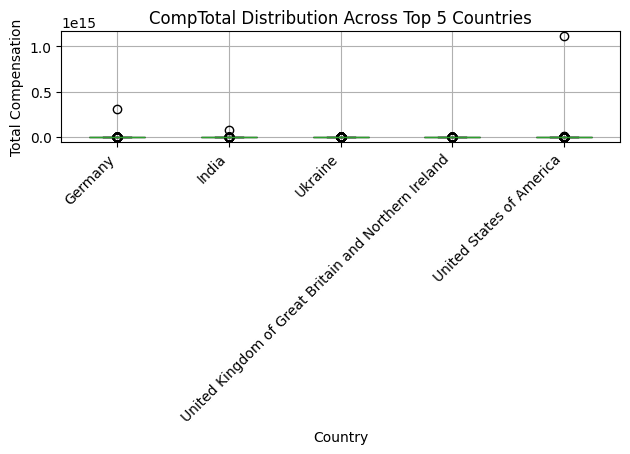

In [33]:
plt.figure(figsize=(12, 8))
df.boxplot(column='CompTotal', by='Country', patch_artist=True,
           boxprops=dict(facecolor='lightgreen'))

plt.title('CompTotal Distribution Across Top 5 Countries')
plt.suptitle('')  # Remove default pandas title
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [34]:
query = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL
  AND Employment != ''
  AND CompTotal IS NOT NULL
  AND CompTotal != '';
"""

df = pd.read_sql_query(query, conn)

In [35]:
# Convert CompTotal to numeric, coerce errors and drop missing values
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df = df.dropna(subset=['CompTotal'])


<Figure size 1200x800 with 0 Axes>

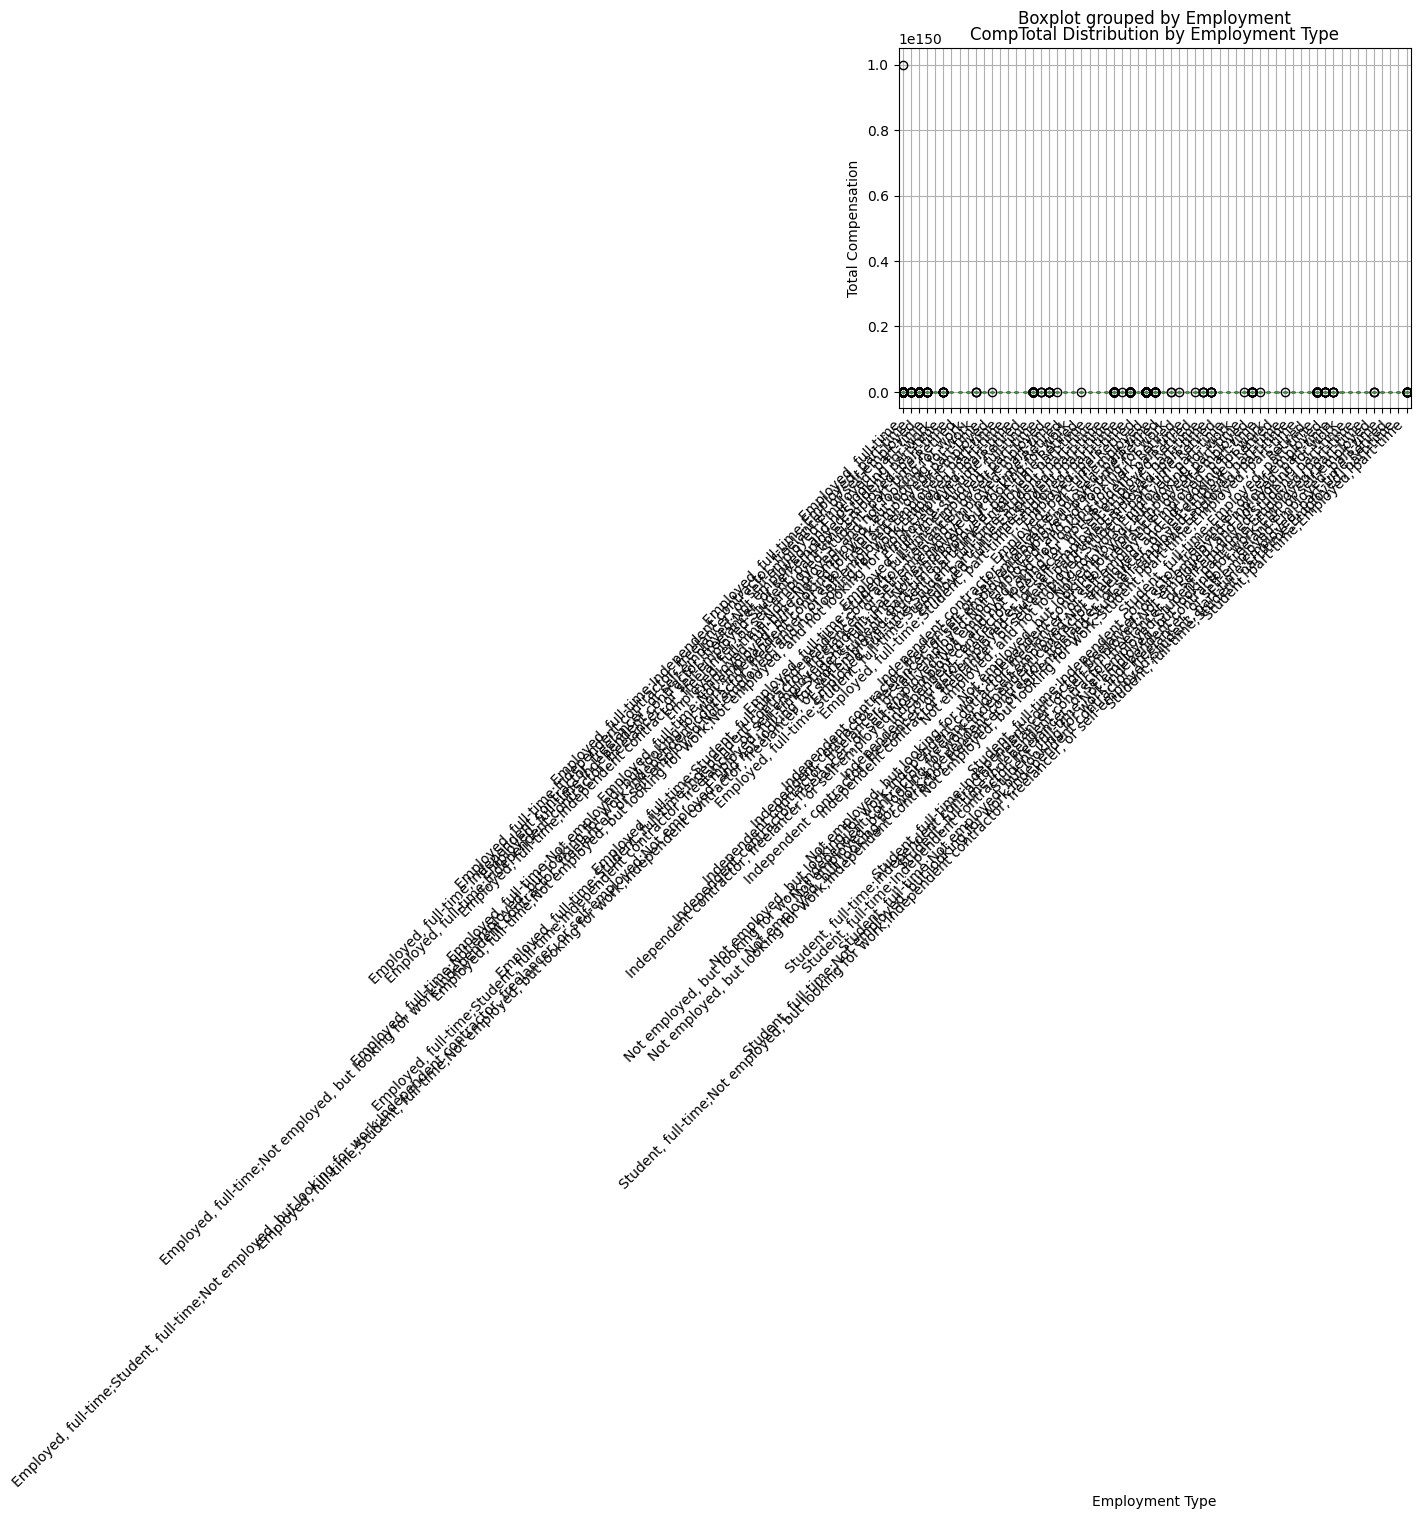

In [40]:
# Plot box plot
plt.figure(figsize=(12, 8))
df.boxplot(column='CompTotal', by='Employment', patch_artist=True,
           boxprops=dict(facecolor='lightblue'))

plt.title('CompTotal Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


In [41]:
# Execute SQL query
query = """
SELECT YearsCodePro, JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL
  AND JobSatPoints_6 IS NOT NULL
  AND YearsCodePro != ''
  AND JobSatPoints_6 != '';
"""

df = pd.read_sql_query(query, conn)

In [42]:
# Convert YearsCodePro and JobSatPoints_6 to numeric (if necessary)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

In [43]:
# Drop rows with missing values after conversion
df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

<Figure size 1200x800 with 0 Axes>

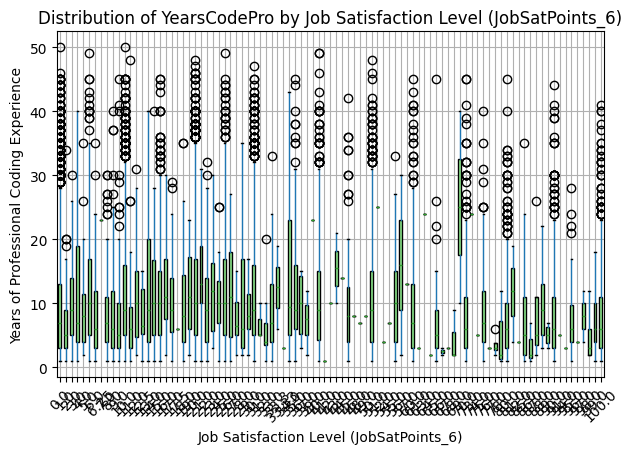

In [44]:
# Plot box plot
plt.figure(figsize=(12, 8))
df.boxplot(column='YearsCodePro', by='JobSatPoints_6', patch_artist=True,
           boxprops=dict(facecolor='lightgreen'))

plt.title('Distribution of YearsCodePro by Job Satisfaction Level (JobSatPoints_6)')
plt.suptitle('')  # Remove the automatic 'Boxplot grouped by...' title
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [45]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
